In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA_ENOSE.csv')
data_raw





,Time (s),Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Proses
0,1,370,194,234,158,125,46,47,46,B
1,2,346,192,229,156,119,50,45,47,B
2,3,331,191,229,160,118,46,44,46,B
3,4,322,191,230,156,118,45,46,46,B
4,5,313,191,230,156,118,46,45,46,B
...,...,...,...,...,...,...,...,...,...,...
1907,247,484,203,270,167,116,62,62,62,P
1908,248,485,203,270,167,116,62,62,62,P
1909,249,484,203,270,167,114,63,61,62,P
1910,250,484,203,270,167,116,62,62,62,P


In [4]:
data_dr = data_raw.drop('Time (s)', axis=1)
data_dr = data_dr.drop('Proses', axis=1)
data_dr



,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8
0,370,194,234,158,125,46,47,46
1,346,192,229,156,119,50,45,47
2,331,191,229,160,118,46,44,46
3,322,191,230,156,118,45,46,46
4,313,191,230,156,118,46,45,46
...,...,...,...,...,...,...,...,...
1907,484,203,270,167,116,62,62,62
1908,485,203,270,167,116,62,62,62
1909,484,203,270,167,114,63,61,62
1910,484,203,270,167,116,62,62,62


<Axes: title={'center': 'Raw Data'}, xlabel='Time(s)', ylabel='Bits'>

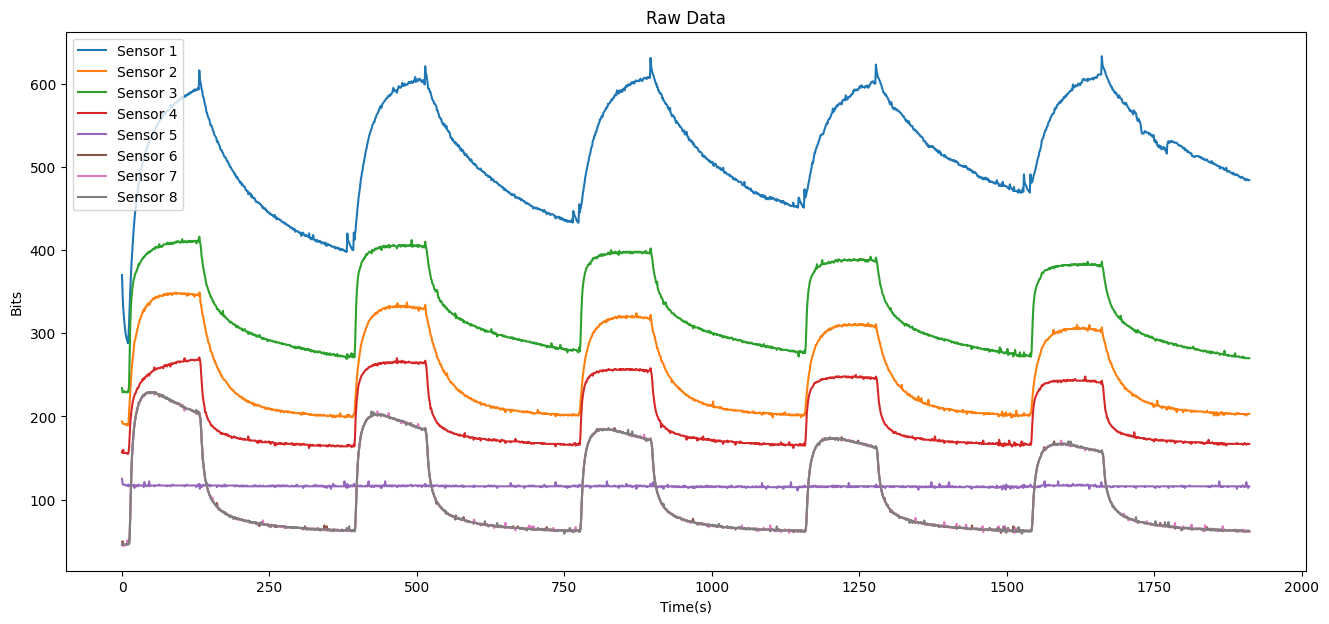

In [20]:
data_dr.plot(title = 'Raw Data', xlabel='Time(s)', ylabel='Bits', figsize=(16,7))

In [17]:
data_new = data_dr.drop('Sensor 5', axis=1)
data_new


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 6,Sensor 7,Sensor 8
0,370,194,234,158,46,47,46
1,346,192,229,156,50,45,47
2,331,191,229,160,46,44,46
3,322,191,230,156,45,46,46
4,313,191,230,156,46,45,46
...,...,...,...,...,...,...,...
1907,484,203,270,167,62,62,62
1908,485,203,270,167,62,62,62
1909,484,203,270,167,63,61,62
1910,484,203,270,167,62,62,62


<Axes: title={'center': 'New Data'}, xlabel='Time(s)', ylabel='Bits'>

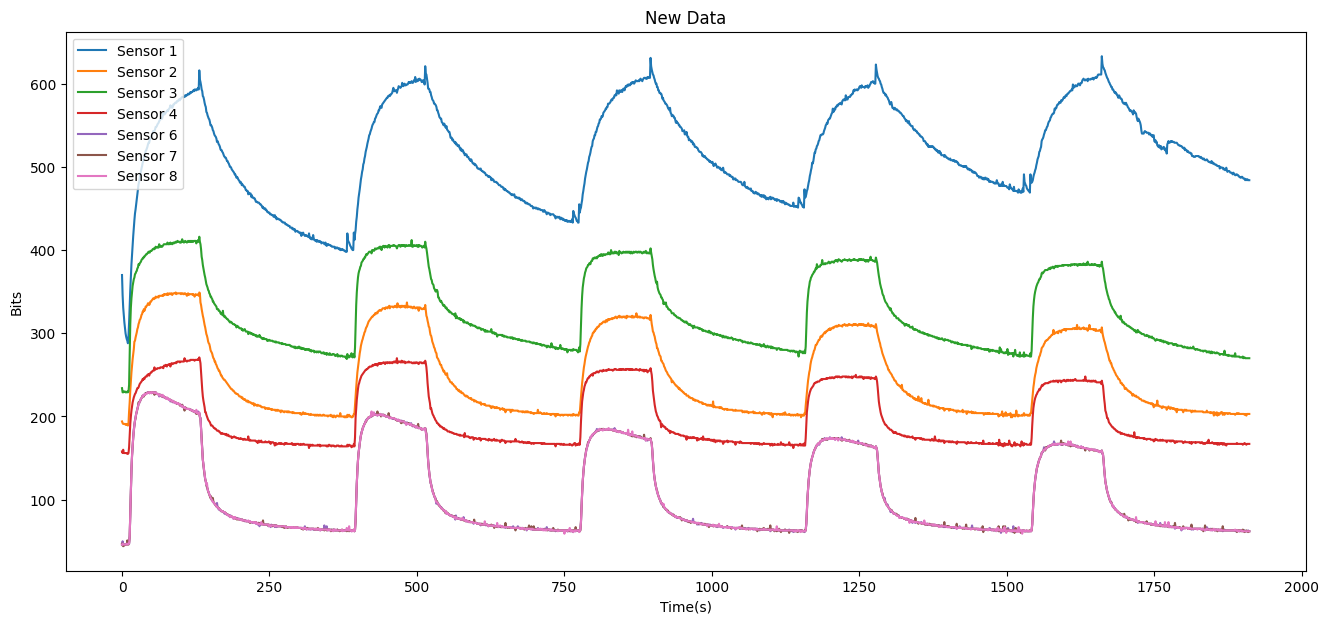

In [7]:
data_new.plot(title = 'New Data', xlabel='Time(s)', ylabel='Bits', figsize = (16,7))

In [21]:
mi = []
for x in range (data_new.shape[1]):
  mi.append(min(data_new.iloc[0:10,x]))
mi
for y in range (data_new.shape[1]):
  for x in range (data_new.shape[0]):
    data_new.iloc[x,y] = data_new.iloc[x,y] - mi[y]
data_new



,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 6,Sensor 7,Sensor 8
0,79,4,5,3,1,3,0
1,55,2,0,1,5,1,1
2,40,1,0,5,1,0,0
3,31,1,1,1,0,2,0
4,22,1,1,1,1,1,0
...,...,...,...,...,...,...,...
1907,193,13,41,12,17,18,16
1908,194,13,41,12,17,18,16
1909,193,13,41,12,18,17,16
1910,193,13,41,12,17,18,16


<Axes: title={'center': 'Normalize Baseline '}, xlabel='Time(s)', ylabel='Bits'>

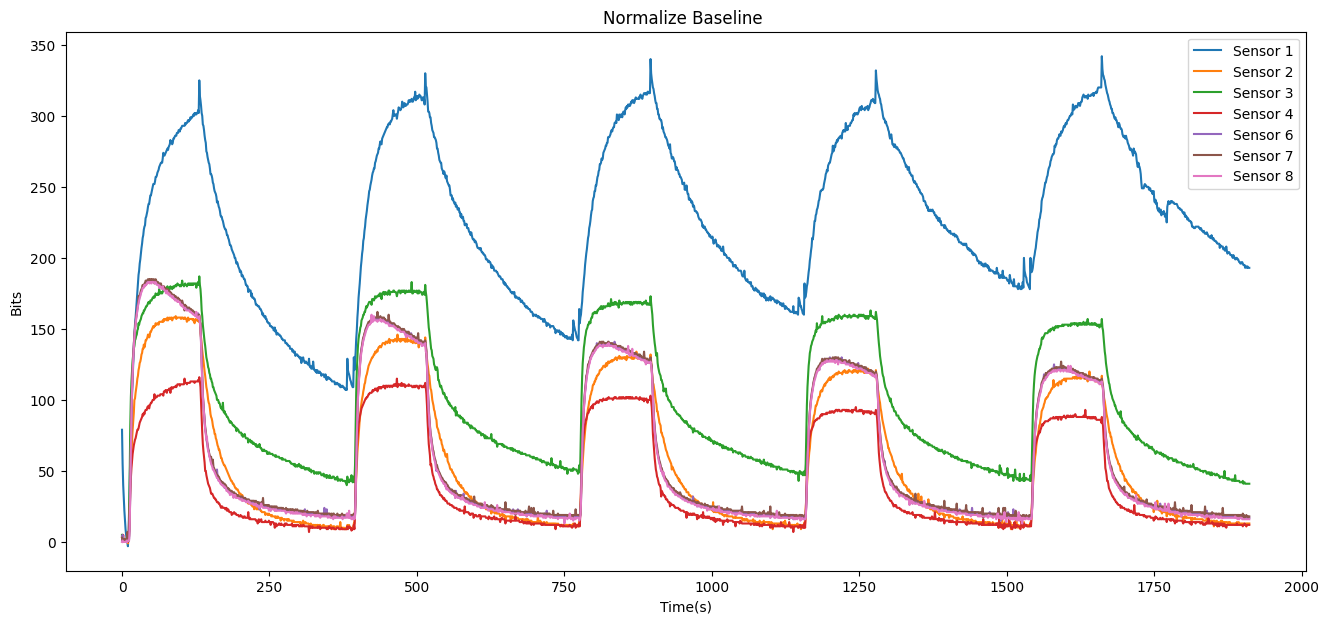

In [9]:
data_new.plot(title = 'Normalize Baseline ', xlabel='Time(s)', ylabel='Bits',figsize=(16,7))


In [22]:
lab = []
for x in range(data_new.shape[0]):
  lab.append(0)
data_new['label'] = lab

data_new


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 6,Sensor 7,Sensor 8,label
0,79,4,5,3,1,3,0,0
1,55,2,0,1,5,1,1,0
2,40,1,0,5,1,0,0,0
3,31,1,1,1,0,2,0,0
4,22,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...
1907,193,13,41,12,17,18,16,0
1908,194,13,41,12,17,18,16,0
1909,193,13,41,12,18,17,16,0
1910,193,13,41,12,17,18,16,0


In [11]:
scaler = StandardScaler()
scaled_data=data_new[["Sensor 1", "Sensor 2", "Sensor 3", "Sensor 4", "Sensor 6"]].copy()
scaled_data=pd.DataFrame(scaler.fit_transform(scaled_data), columns=scaled_data.columns)
scaled_data


,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 6
0,-2.450451,-1.079314,-1.906395,-1.042473,-1.120712
1,-2.849602,-1.119443,-2.009692,-1.095435,-1.046202
2,-3.099071,-1.139507,-2.009692,-0.989512,-1.120712
3,-3.248752,-1.139507,-1.989033,-1.095435,-1.139340
4,-3.398434,-1.139507,-1.989033,-1.095435,-1.120712
...,...,...,...,...,...
1907,-0.554486,-0.898738,-1.162655,-0.804146,-0.822671
1908,-0.537855,-0.898738,-1.162655,-0.804146,-0.822671
1909,-0.554486,-0.898738,-1.162655,-0.804146,-0.804044
1910,-0.554486,-0.898738,-1.162655,-0.804146,-0.822671


In [12]:
pca = PCA(5)
pca.fit(scaled_data)
eig_vectors = pca.components_

eigenvec_df = pd.DataFrame(eig_vectors)
eigenvec_df.columns = ['eigvec_'+str(i+1) for i in range( 0,
len(eig_vectors))]
eigenvec_df



,eigvec_1,eigvec_2,eigvec_3,eigvec_4,eigvec_5
0,0.378759,0.466636,0.466947,0.460984,0.456341
1,0.900996,-0.086398,-0.069128,-0.247624,-0.338594
2,0.161331,-0.623755,-0.330960,0.668994,0.166776
3,-0.124007,-0.273869,0.694269,0.266846,-0.596994
4,-0.057818,0.557415,-0.430857,0.455430,-0.541194


In [23]:
eigval = pca.explained_variance_
eigval_df = pd.DataFrame(eigval)

eigval_df = eigval_df.set_axis(['eigval_'+str(i+1) for i in range(0, len(eigval))])
eigval_df


,0
eigval_1,4.520646
eigval_2,0.432491
eigval_3,0.023039


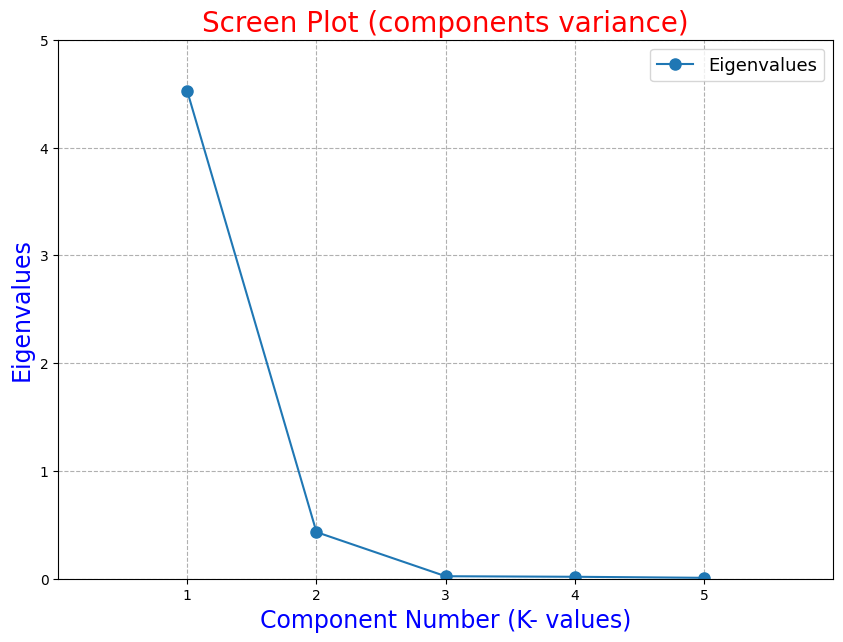

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.title("Screen Plot (components variance)", color='Red', fontsize=20)
plt.xticks(np.arange(1, 6, 1))
plt.xlim(0, 6)
plt.ylim(0, 5)
plt.ylabel("Eigenvalues", fontsize=17, color='blue')
plt.xlabel("Component Number (K- values)", fontsize=17, color='blue')
plt.grid(linestyle='--')
plt.plot(range(1, 6), eigval, linestyle='-', label="Eigenvalues", marker='o', markersize=8)
plt.legend(loc=1, prop={'size': 13})



In [24]:
X = scaled_data

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=data_new['Sensor 1'],
                 color_discrete_map={'hijau': 'green', 'biru': 'blue', 'merah': 'red'},
                 labels={'0': 'PC 1', '1': 'PC 2'})

fig.show()

pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=data_new['Sensor 1'],
                    color_discrete_map={'hijau': 'green', 'biru': 'blue', 'merah': 'red'},
                    title=f'Total Explained Variance: {total_var:.2f}%',
                    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})

fig.show()